In [667]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

In [668]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [669]:
# df3p = pd.read_csv('/Users/bryan/Studio/seq2/data/merge_samples/mix13_tag694_3p.csv')
# df3p = pd.read_csv('/Users/bryan/Studio/seq2/data/merge_samples/mix13_tag826_3p.csv')
# df5p = pd.read_csv('/Users/bryan/Studio/seq2/data/merge_samples/mix13_5p.csv')
# df3p = pd.read_csv('/Users/bryan/Studio/seq2/data/merge_samples/mix10_3p.csv')
# df5p = pd.read_csv('/Users/bryan/Studio/seq2/data/merge_samples/mix10_5p.csv')
df3p = pd.read_excel('/Users/bryan/Studio/Notebooks/data/3p.xlsx')
df5p = pd.read_excel('/Users/bryan/Studio/Notebooks/data/5p.xlsx')
df3p.shape, df5p.shape

((276, 7), (3310, 7))

In [670]:
# df5p = df5p.append({'Mass': 18.0106, 'RT': 0.66, 'Vol': 10000}, ignore_index=True)
# df5p = df5p.append({'Mass': 347.0631, 'RT': 0.99, 'Vol': 10000}, ignore_index=True)
# df5p = df5p.append({'Mass': 323.0519, 'RT': 0.99, 'Vol': 10000}, ignore_index=True)
# df5p = df5p.append({'Mass': 363.058, 'RT': 0.99, 'Vol': 10000}, ignore_index=True)
# df5p = df5p.append({'Mass': 324.0359, 'RT': 0.99, 'Vol': 10000}, ignore_index=True)

basecpds_5p = [{'Mass': 18.0106, 'RT': 0.66, 'Vol': 10000},
              {'Mass': 347.0631, 'RT': 0.99, 'Vol': 10000},
              {'Mass': 323.0519, 'RT': 0.99, 'Vol': 10000},
              {'Mass': 363.058, 'RT': 0.99, 'Vol': 10000},
              {'Mass': 324.0359, 'RT': 0.99, 'Vol': 10000}]
df5p = df5p.append(basecpds_5p, ignore_index=True)

basecpds_3p = [{'Mass': 694.2397, 'RT': 6.66, 'Vol': 20000}]
# basecpds_3p = [{'Mass': 826.3184, 'RT': 6.66, 'Vol': 20000}]
df3p = df3p.append(basecpds_3p, ignore_index=True)

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


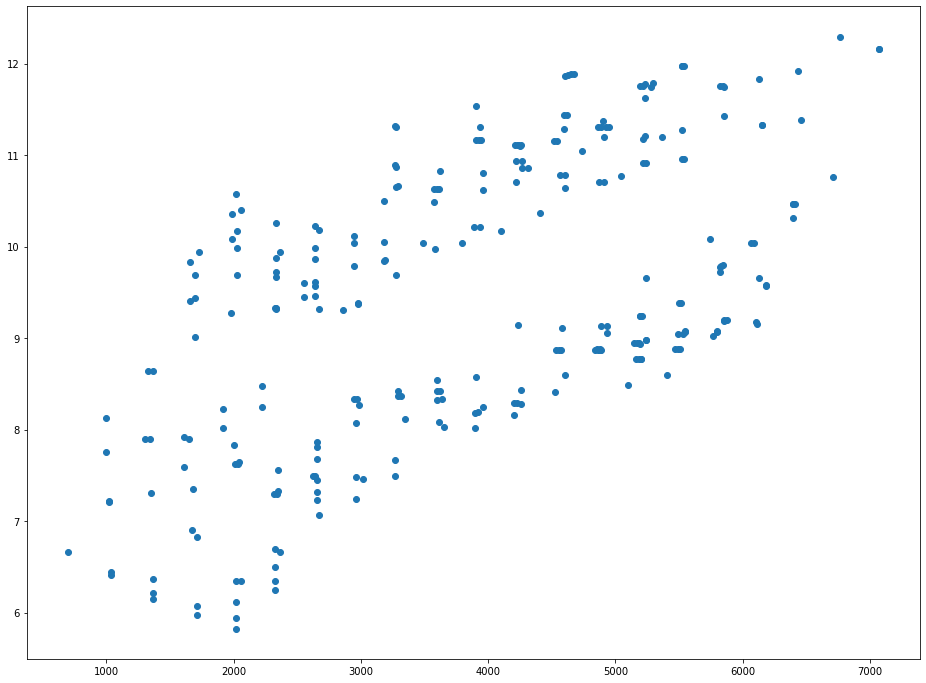

In [671]:
plt.figure(figsize=(16, 12))
plt.scatter(df3p['Mass'], df3p['RT'])

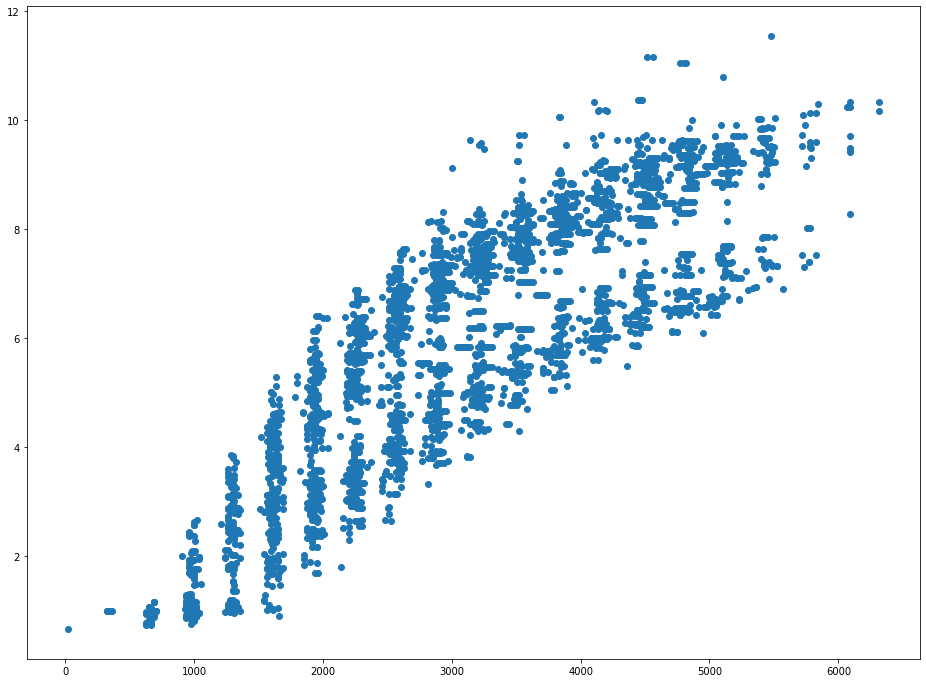

In [672]:
plt.figure(figsize=(16, 12))
plt.scatter(df5p['Mass'], df5p['RT'])

Text(0, 0.5, 'RT')

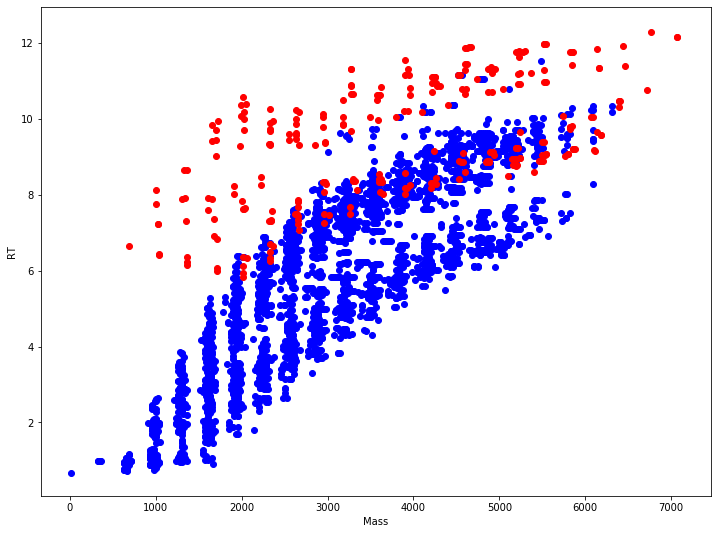

In [682]:
plt.figure(figsize=(12, 9))
plt.scatter(df5p['Mass'], df5p['RT'], color='b')
plt.scatter(df3p['Mass'], df3p['RT'], color='r')
plt.xlabel('Mass')
plt.ylabel('RT')

(7124, 7)

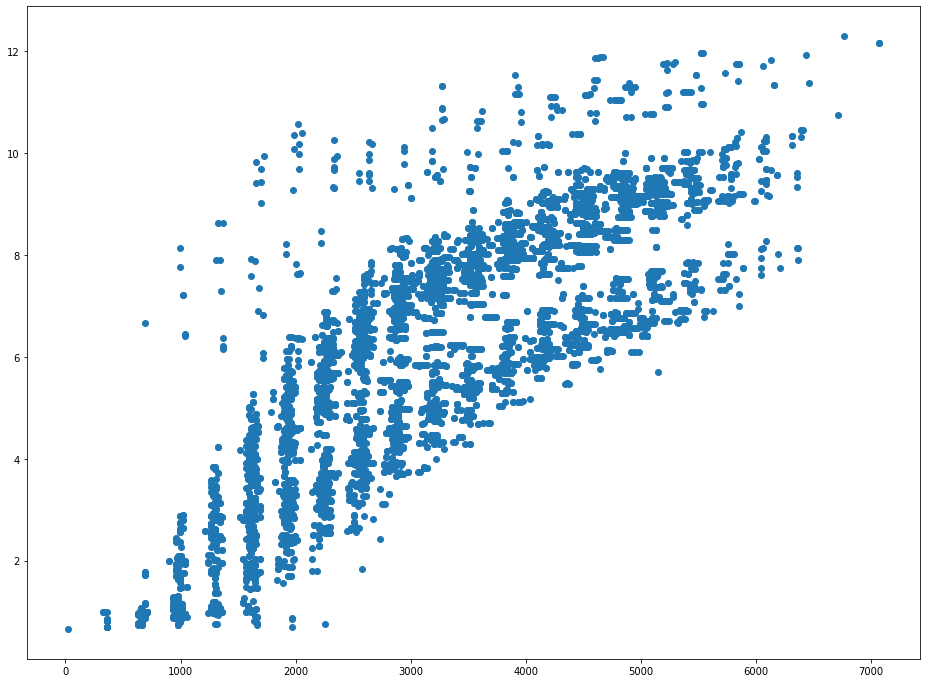

In [653]:
merge_df = pd.concat([df3p, df5p])
plt.figure(figsize=(16, 12))
plt.scatter(merge_df['Mass'], merge_df['RT'])
merge_df.shape

In [683]:
df3p_mass_np = np.array(df3p['Mass'])
df5p_mass_np = np.array(df5p['Mass'])
mass_sum_np = df3p_mass_np[:, np.newaxis] + df5p_mass_np

In [684]:
mass_sum_0 = np.round(mass_sum_np, 0)
mass_sum_1 = np.round(mass_sum_np, 1)
mass_sum_2 = np.round(mass_sum_np, 2)
mass_sum_3 = np.round(mass_sum_np, 3)

In [685]:
# TAG = 826.3184
TAG = 694.2397

In [686]:
# seq_mass = 6781.0763 #19
# seq_mass = 7079.0861 #20
# seq_mass = 7522.1079 #21
# seq_mass = 7088.0775 #201
# seq_mass = 6985.0417 #202
seq_mass = 7073.0735 #203
# seq_mass = 6954.9831 #204
# seq_mass = 7110.0883 #205
# seq_mass = 7151.113 #206
# seq_mass = 7193.0523 #207

# seq_mass = 8832.3519 #s09
# seq_mass = 9501.4446 #s10
# seq_mass = 10190.5566 #s12
# seq_mass = 7234.1721 #s13
sum_value = round(seq_mass + 18.0106, 1)

In [687]:
end_5p = sum_value - 80 - TAG
masses = df5p.Mass
print(end_5p)
BIAS = 0.1
end5p_idxs = masses[(masses>=end_5p-BIAS) & (masses<=end_5p+BIAS)].index
df5p_endpoints = df5p.loc[end5p_idxs]
print(df5p_endpoints)

masses = df3p.Mass
end3p_idxs = masses[(masses>=seq_mass-BIAS) & (masses<=seq_mass+BIAS)].index
end3p_endpoints = df3p.loc[end3p_idxs]
print(seq_mass, end3p_endpoints)

6316.8603
   Unnamed: 0     Cpd       Mass      RT       Vol  Width  Quality Score
0      6354.0  1351.0  6316.8541  10.330  72694952  0.109          100.0
1      6355.0  1301.0  6316.8438  10.167   3205948  0.093           87.0
7073.0735      Unnamed: 0     Cpd       Mass      RT       Vol  Width  Quality Score
0        6309.0  1540.0  7073.0472  12.156  82887552   0.12          100.0
275      6309.0  1540.0  7073.0472  12.156  82887552   0.12          100.0


In [688]:
df5p.columns

Index(['Unnamed: 0', 'Cpd', 'Mass', 'RT', 'Vol', 'Width', 'Quality Score'], dtype='object')

In [689]:
end5p_idx = df5p_endpoints['Vol'].idxmax()
df5p_endpoint = df5p.loc[end5p_idx]
df5p_endpoint

Unnamed: 0       6.354000e+03
Cpd              1.351000e+03
Mass             6.316854e+03
RT               1.033000e+01
Vol              7.269495e+07
Width            1.090000e-01
Quality Score    1.000000e+02
Name: 0, dtype: float64

In [690]:
mass_sum_df = pd.DataFrame(mass_sum_np)
mass_sum_df1 = pd.DataFrame(mass_sum_1)

tmp = mass_sum_df1[(mass_sum_df1 >= sum_value-0.1) & (mass_sum_df1 <= sum_value+0.1)]
final_idx_pairs = list(tmp[tmp.notnull()].stack().index)
df3_idxs = [pair[0] for pair in final_idx_pairs]
df5_idxs = [pair[1] for pair in final_idx_pairs]
df3_idxs = list(set(df3_idxs))
df5_idxs = list(set(df5_idxs))
print("df3_idxs {} df5_idxs {}".format(len(df3_idxs), len(df5_idxs)))

df3_idxs 121 df5_idxs 179


In [691]:
# df5_idxs.extend(list(end5p_idxs))
df5_idxs.append(end5p_idx)
print(len(df5_idxs))

180


(180, 7)


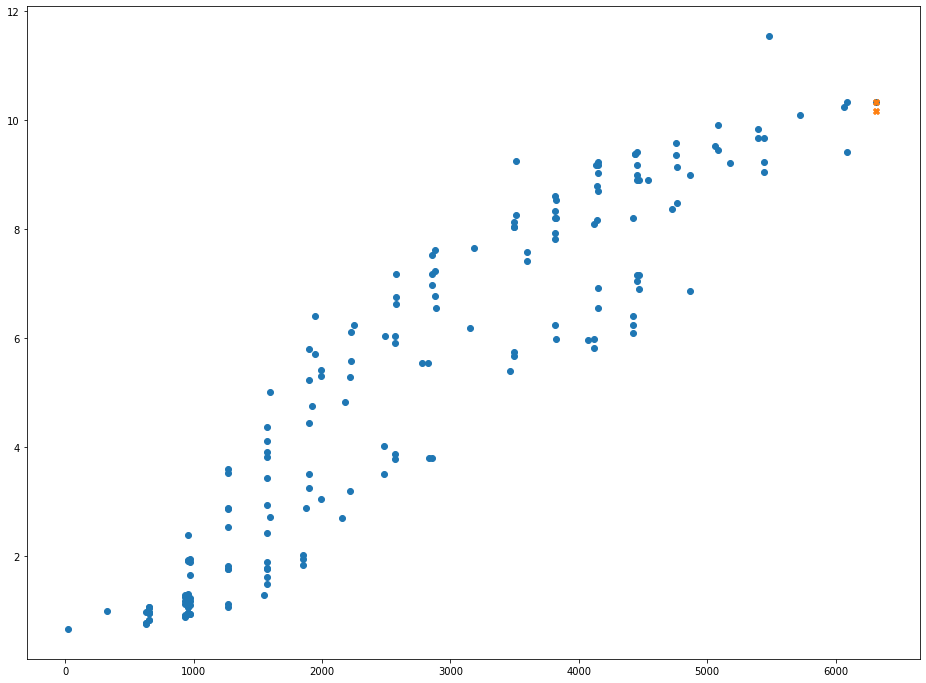

In [692]:
plt.figure(figsize=(16, 12))
df5p_selected = df5p.iloc[df5_idxs]
print(df5p_selected.shape)
df5p_selected = df5p_selected.sort_values('Mass')
plt.scatter(df5p_selected['Mass'], df5p_selected['RT'])
plt.scatter(df5p_endpoints['Mass'], df5p_endpoints['RT'], marker='X')

(179, 8)
[-6.72298336e-08  1.85424229e-03 -3.93066404e-01]


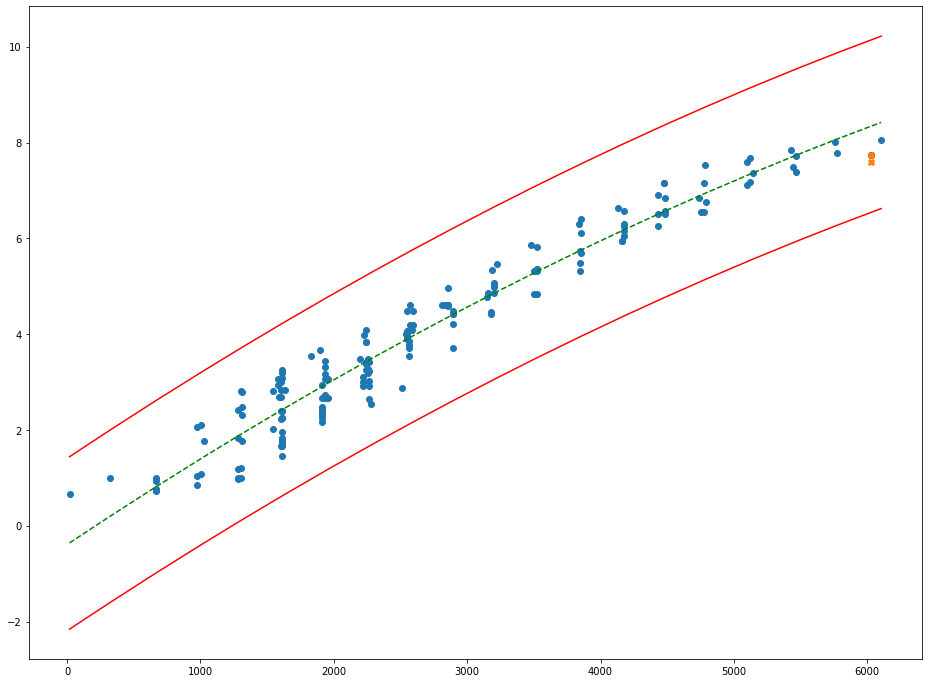

In [568]:
plt.figure(figsize=(16, 12))
TOP_RT = 8
# df5p_selected = df5p_selected[df5p_selected.RT < TOP_RT]
print(df5p_selected.shape)
df5p_selected = df5p_selected.sort_values('Mass')
plt.scatter(df5p_selected['Mass'], df5p_selected['RT'])
plt.scatter(df5p_endpoints['Mass'], df5p_endpoints['RT'], marker='X')

df5p_selected = df5p_selected.sort_values('Mass')
x = df5p_selected['Mass']
y = df5p_selected['RT']
z5 = np.polyfit(x, y, 2)
print(z5)
def f(x):
    return z5[0]*x*x+z5[1]*x+z5[2]
fx = f(x)
plt.plot(x, fx, 'g--')
plt.plot(x, fx+1.8, 'r')
plt.plot(x, fx-1.8, 'r')

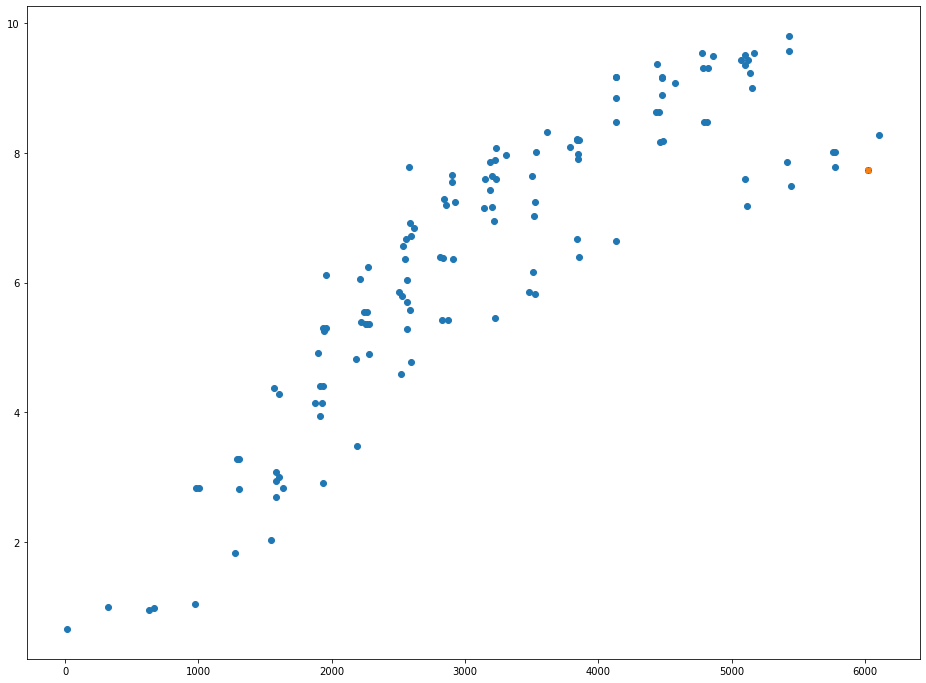

In [462]:
# idxs = list()
# for idx, row in df5p_selected.iterrows():
#     if (row['RT'] > f(row['Mass'])-1) and (row['RT'] < f(row['Mass'])+1):
#         print(idx)
#         idxs.append(idx)
# df5p_selected.loc[idxs]

df5p_tmp = df5p_selected[(df5p_selected.RT > f(df5p_selected.Mass)-1.8) & (df5p_selected.RT <f(df5p_selected.Mass)+1.8)]
plt.figure(figsize=(16, 12))
plt.scatter(df5p_tmp['Mass'], df5p_tmp['RT'])
plt.scatter(df5p_endpoints['Mass'], df5p_endpoints['RT'], marker='X')

[-2.15184009e-07  3.08117339e-03 -9.34792115e-01]


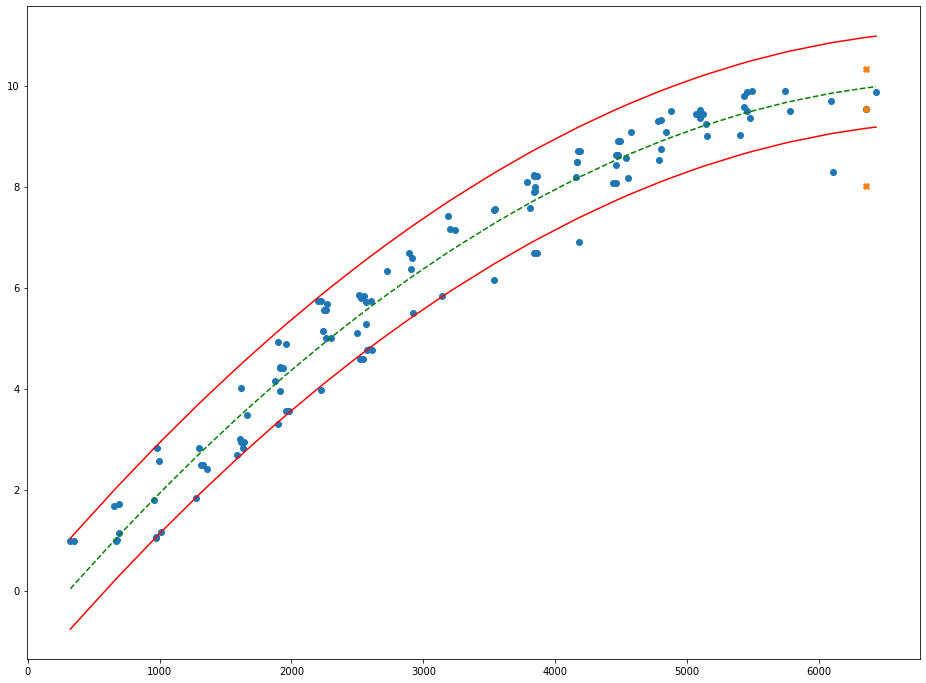

In [143]:
plt.figure(figsize=(16, 12))

df5p_tmp = df5p_tmp.sort_values('Mass')
x = df5p_tmp['Mass']
y = df5p_tmp['RT']
z5 = np.polyfit(x, y, 2)
print(z5)
def f(x):
    return z5[0]*x*x+z5[1]*x+z5[2]
fx = f(x)
plt.plot(x, fx, 'g--')
plt.plot(x, fx+1, 'r')
plt.plot(x, fx-0.8, 'r')
plt.scatter(x, y)
plt.scatter(df5p_endpoints['Mass'], df5p_endpoints['RT'], marker='X')

In [144]:
df5p_tmp = df5p_tmp[(df5p_tmp.RT > f(df5p_tmp.Mass)-1) & (df5p_tmp.RT <f(df5p_tmp.Mass)+1)]

(121, 7)


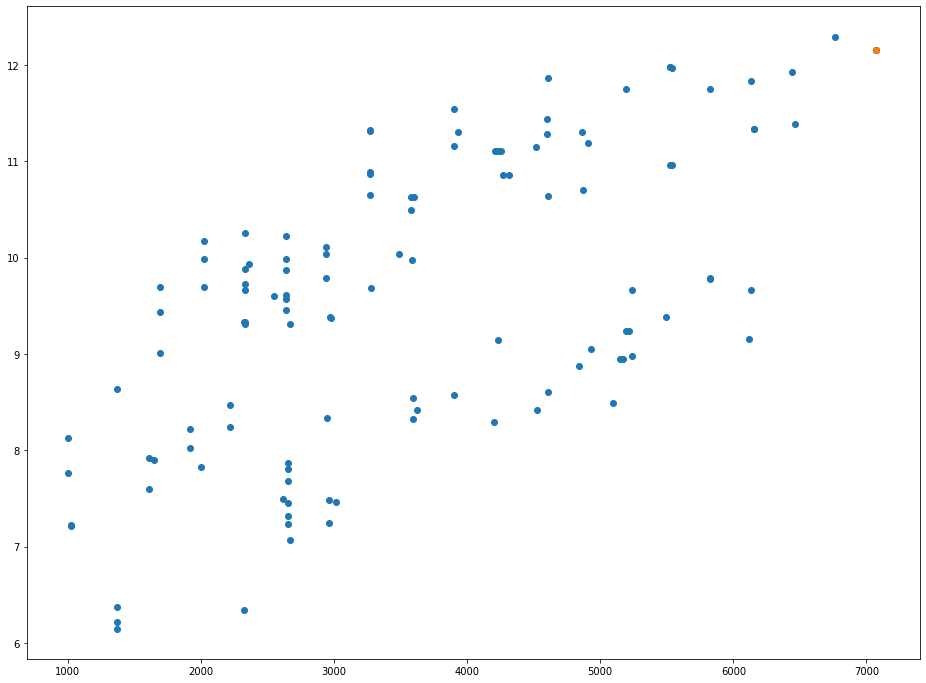

In [693]:
plt.figure(figsize=(16, 12))
df3p_selected = df3p.iloc[df3_idxs]
print(df3p_selected.shape)
df3p_selected = df3p_selected.sort_values('Mass')
plt.scatter(df3p_selected['Mass'], df3p_selected['RT'])
plt.scatter(end3p_endpoints['Mass'], end3p_endpoints['RT'], marker='X')

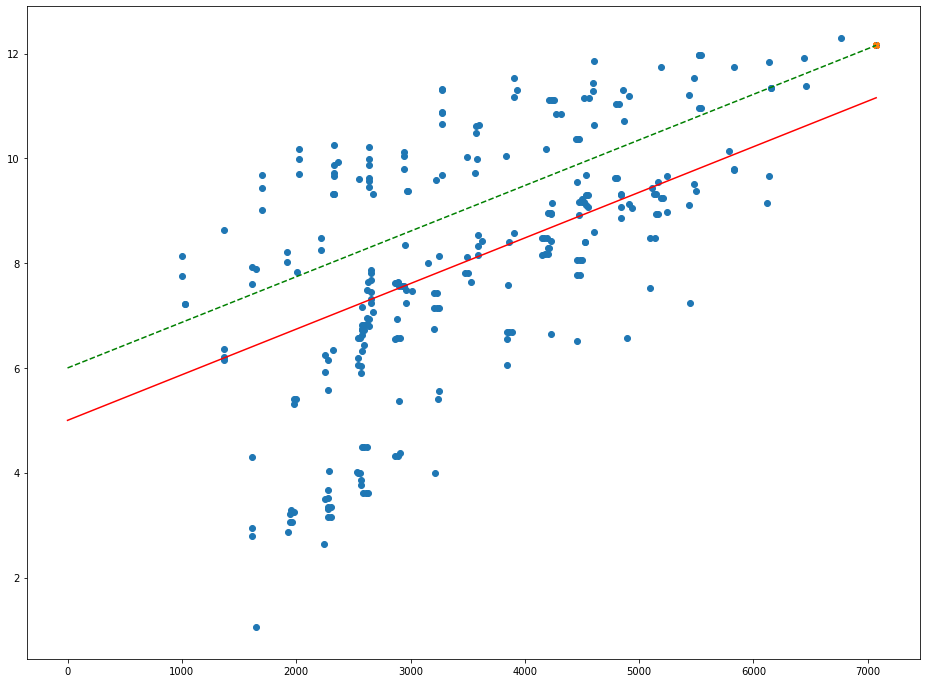

In [639]:
# x = df3p_selected['Mass']
# y = df3p_selected['RT']
x = pd.Series([0, 7073.0472])
y = pd.Series([6, 12.156])
z = np.polyfit(x, y, 1)
def f_3p(x):
    return z[0]*x+z[1]

plt.figure(figsize=(16, 12))
plt.plot(x, f_3p(x), 'g--')
# plt.plot(x, f_3p(x)-1, 'r')
plt.scatter(df3p_selected['Mass'], df3p_selected['RT'])
plt.scatter(end3p_endpoints['Mass'], end3p_endpoints['RT'], marker='X')

Text(0, 0.5, 'RT')

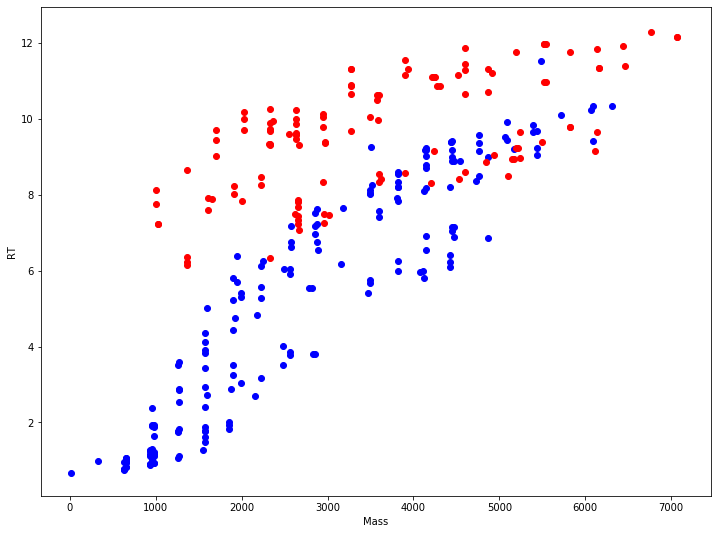

In [694]:
plt.figure(figsize=(12, 9))
plt.scatter(df5p_selected['Mass'], df5p_selected['RT'], color='b')
plt.scatter(df3p_selected['Mass'], df3p_selected['RT'], color='r')
plt.xlabel('Mass')
plt.ylabel('RT')

In [696]:
df_seqs = pd.read_csv('/Users/bryan/Studio/seq2/seqs.csv')

Text(0, 0.5, 'RT')

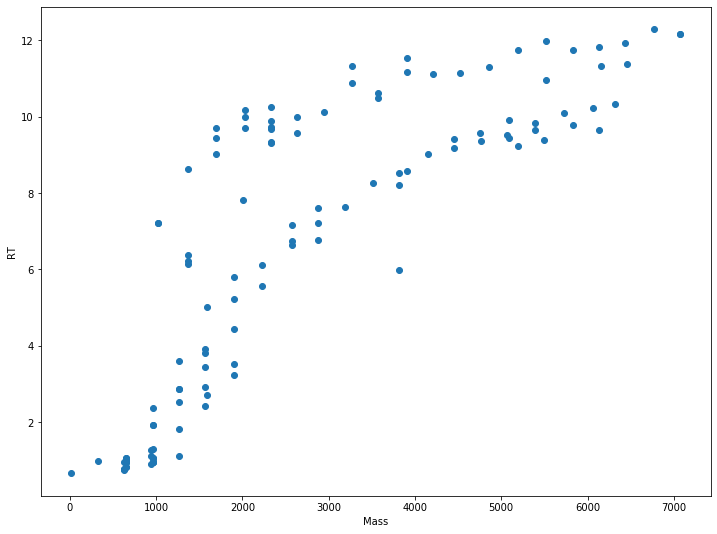

In [698]:
plt.figure(figsize=(12, 9))
plt.scatter(df_seqs['Mass'], df_seqs['RT'])
plt.xlabel('Mass')
plt.ylabel('RT')

In [640]:

df3p_tmp = df3p_selected[df3p_selected.RT > f_3p(df3p_selected.Mass)]

In [699]:
merge_df = pd.concat([df3p_selected, df5p_selected])
# merge_df = pd.concat([df3p_tmp, df5p_tmp])
print(merge_df.shape)
merge_df.to_csv('data/merge.csv')

(301, 7)


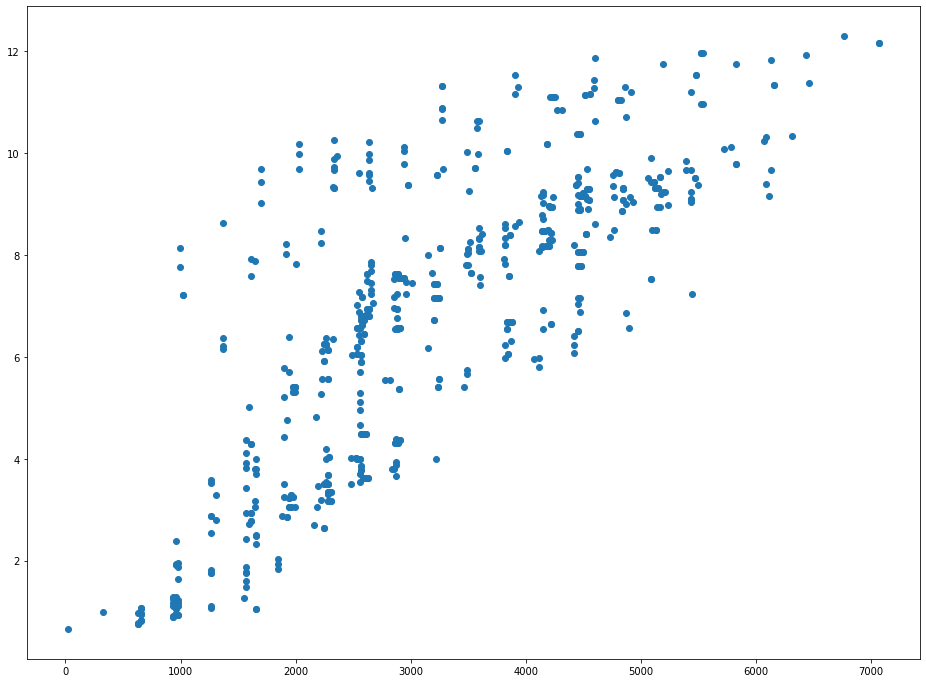

In [666]:
plt.figure(figsize=(16, 12))
plt.scatter(merge_df['Mass'], merge_df['RT'])
# plt.scatter(end3p_endpoints['Mass'], end3p_endpoints['RT'], marker='X', color='r')
# plt.scatter(df5p_endpoints['Mass'], df5p_endpoints['RT'], marker='X', color='r')